In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Restricting warning message
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
StockData=pd.read_csv('/content/drive/MyDrive/Programming Project Soft Tech/Stock timeframe/D1/SBUX.US_D1.csv')
print('Shape before deleting duplicate values:', StockData.shape)

#Deleting duplicate data
StockData=StockData.drop_duplicates()
print('Shape After deleting duplicate values:', StockData.shape)

#Printing data
StockData.head(10)

Shape before deleting duplicate values: (6639, 6)
Shape After deleting duplicate values: (6639, 6)


,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105
5,1998-01-09,35.75,36.01,34.37,35.13,713703
6,1998-01-12,34.50,35.37,34.25,35.19,855603
7,1998-01-13,35.38,35.63,35.00,35.56,460200
8,1998-01-14,35.63,35.63,35.07,35.19,336200
9,1998-01-15,35.13,35.26,33.75,34.00,742700


In [3]:
StockData.tail()

,datetime,open,high,low,close,volume
6634,2024-03-08,90.95,91.53,90.60,91.07,5115057
6635,2024-03-09,91.06,91.09,91.05,91.05,4882
6636,2024-03-11,91.26,92.96,91.17,92.07,3796900
6637,2024-03-12,92.00,92.72,91.21,92.42,6207319
6638,2024-03-13,92.55,92.87,90.87,91.59,4772185


<Axes: >

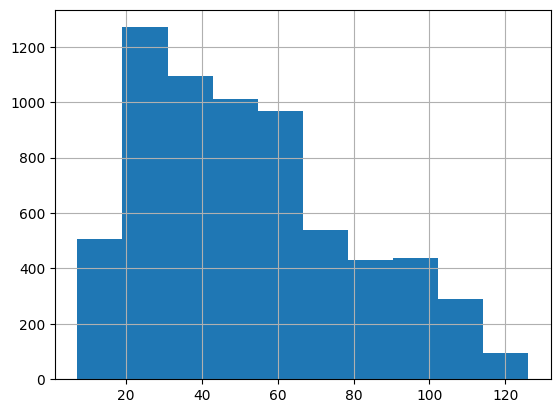

In [4]:
StockData['close'].hist()

In [5]:
StockData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6639 non-null   object 
 1   open      6639 non-null   float64
 2   high      6639 non-null   float64
 3   low       6639 non-null   float64
 4   close     6639 non-null   float64
 5   volume    6639 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.3+ KB


In [6]:
StockData.describe(include='all')

,datetime,open,high,low,close,volume
count,6639,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
unique,6639,NaN,NaN,NaN,NaN,NaN
top,1998-01-02,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.025905,52.605072,51.438399,52.034272,5.793768e+06
std,NaN,27.161870,27.312972,26.994025,27.155434,4.658699e+06
min,NaN,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,NaN,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,NaN,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,NaN,71.500000,72.215000,70.680000,71.390000,7.301760e+06


In [7]:
StockData.nunique()

,0
datetime,6639
open,4356
high,4370
low,4301
close,4417
volume,6623


array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>],
       [<Axes: title={'center': 'volume'}>, <Axes: >]], dtype=object)

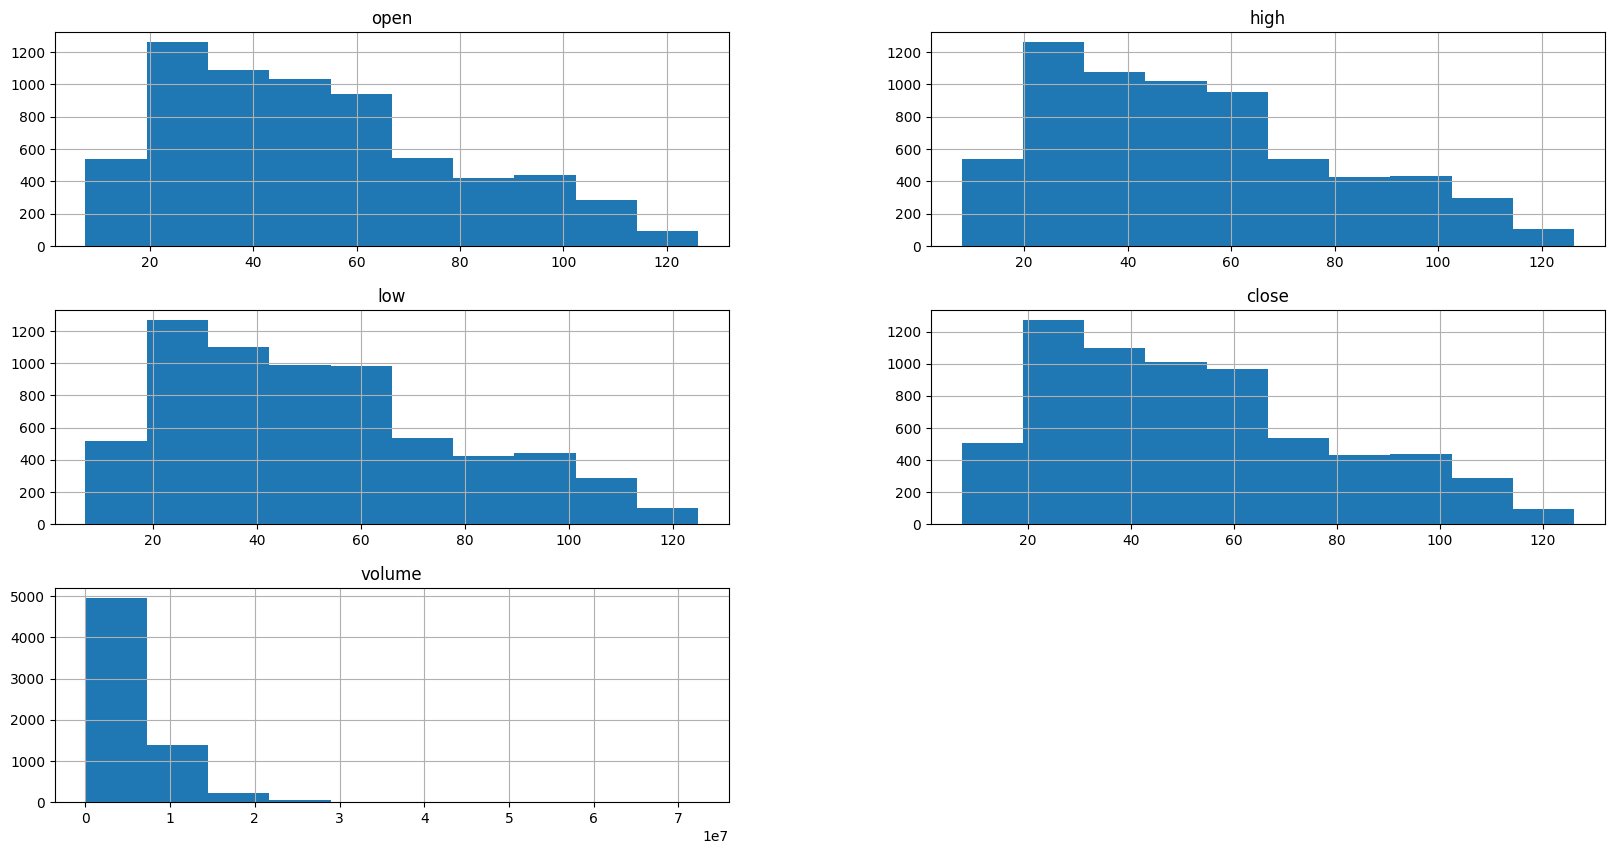

In [8]:
# Plotting histograms for items that has value
StockData[['datetime', 'open', 'high', 'low', 'close', 'volume']].hist(figsize=(20, 10))

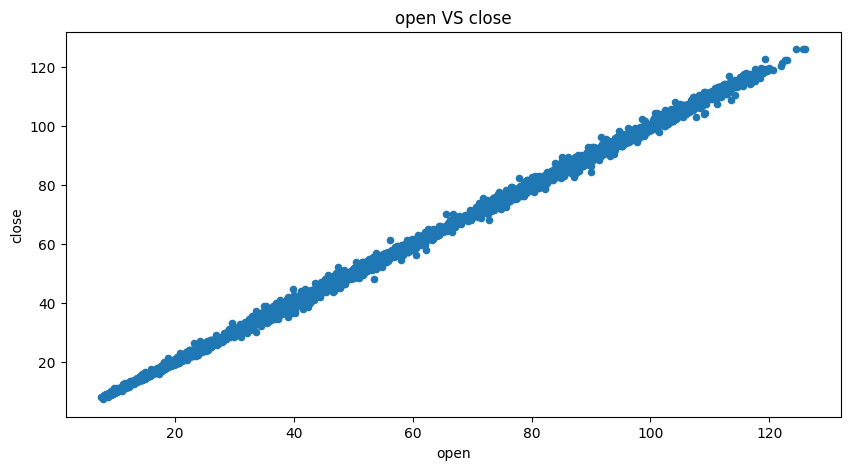

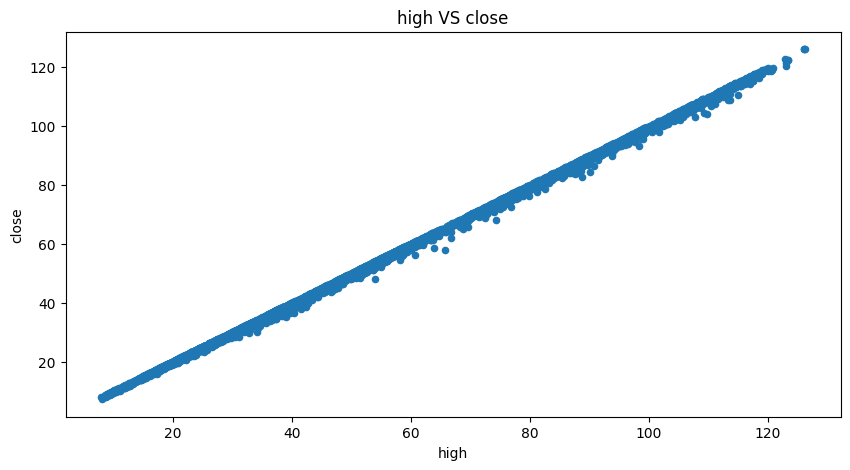

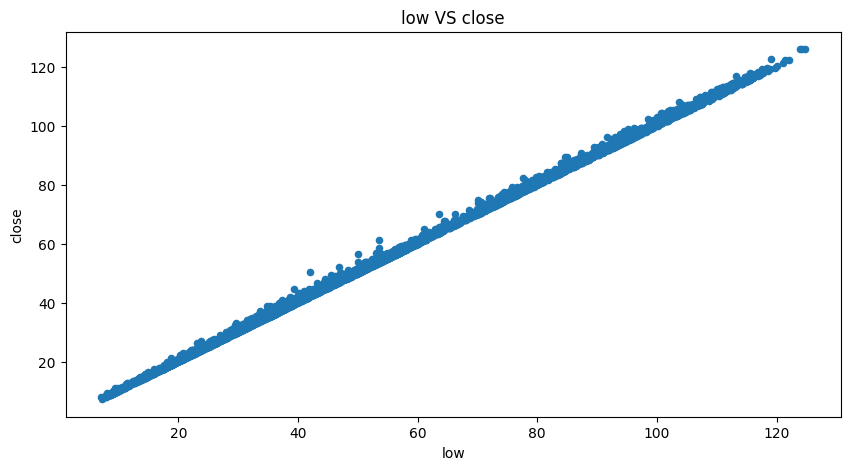

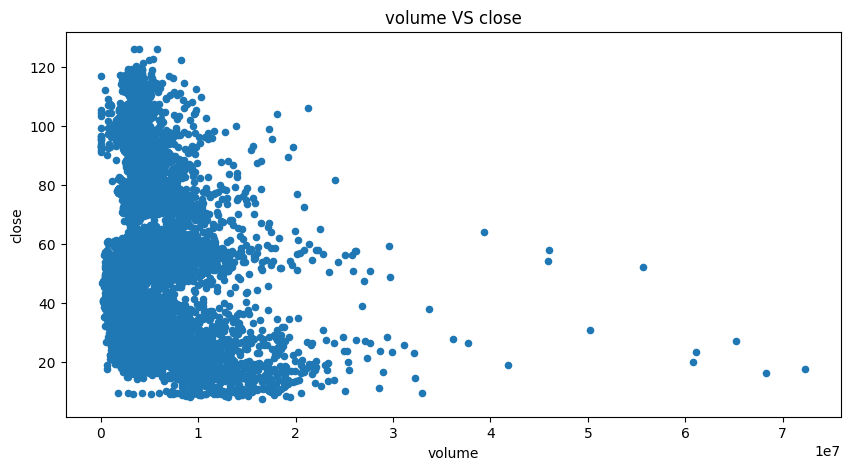

In [9]:
ContinuousCols=['open','high', 'low', 'volume',]
for predictor in ContinuousCols:
  StockData.plot.scatter(x=predictor, y='close', figsize=(10,5), title=predictor+" VS "+ 'close')

In [10]:
ContinuousCols=['close','low', 'high', 'open', 'volume']
# Creating the correlation matrix
CorrelationData=StockData[ContinuousCols].corr()
CorrelationData

,close,low,high,open,volume
close,1.000000,0.999762,0.999770,0.999524,-0.191477
low,0.999762,1.000000,0.999640,0.999742,-0.194200
high,0.999770,0.999640,1.000000,0.999763,-0.189593
open,0.999524,0.999742,0.999763,1.000000,-0.191927
volume,-0.191477,-0.194200,-0.189593,-0.191927,1.000000


In [11]:
#Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['close'][abs(CorrelationData['close']) > 0.5 ]

,close
close,1.000000
low,0.999762
high,0.999770
open,0.999524


In [12]:
# List of selected features for the machine learning model
SelectedColumns = ['open', 'high', 'low', 'close', 'volume']

# Selecting the final columns
DataForML = StockData[SelectedColumns]

# Displaying the first few rows of the selected data
DataForML.head()


,open,high,low,close,volume
0,38.38,38.63,37.31,37.50,594000
1,37.63,37.78,36.75,37.13,644000
2,37.13,37.38,35.56,35.63,1183300
3,35.50,36.44,34.25,34.69,2039005
4,34.56,36.01,34.00,35.76,1638105


In [13]:
#Saving the dataml
DataForML.to_pickle('DataForML.pkl')

In [14]:
# Printing all the column names for our reference
DataForML.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [15]:
#Separate Target Variable and Predictor Variables
TargetVariable='close'
Predictors=['high', 'open', 'low', 'volume']
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4647, 4)
(4647,)
(1992, 4)
(1992,)


In [24]:
# Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
RegModel = LinearRegression()

# Creating the model on Training Data
LREG = RegModel.fit(X_train, y_train)

# Making predictions on the test data
prediction = LREG.predict(X_test)

# Measuring the Goodness of fit in Training data using R2 score
print('R2 Value (Training):', metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Creating a DataFrame for the test results
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = np.round(prediction)

# Printing some sample values of prediction
print(TestingDataResults.head())

# Calculating the error for each row using Absolute Percentage Error (APE)
TestingDataResults['APE'] = 100 * (abs(TestingDataResults[TargetVariable] - TestingDataResults['Predicted_' + TargetVariable]) / TestingDataResults[TargetVariable])

# Mean Absolute Percentage Error (MAPE) calculation
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

# Calculating Accuracy based on MAPE
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outliers
print('Median Accuracy on test data:', MedianAccuracy)

###########################################################################
# Defining a custom function to calculate accuracy (MAPE based)
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom Scoring MAPE calculation using cross-validation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross-validation function from sklearn
from sklearn.model_selection import cross_val_score

#Scaling the dataset as X
X_scaled = PredictorScalerFit.transform(X)

# Running 10-Fold Cross-validation
Accuracy_Values = cross_val_score(RegModel, X_scaled, y, cv=10, scoring=custom_Scoring)

print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

R2 Value (Training): 0.9998142388744705

##### Model Validation and Accuracy Calculations ##########
       high      open       low    volume   close  Predicted_close
0  0.334741  0.334683  0.337410  0.035590   47.03             47.0
1  0.509289  0.502530  0.509469  0.133961   68.15             68.0
2  0.117801  0.119686  0.122887  0.112320   21.78             22.0
3  0.251224  0.249663  0.252144  0.107863   37.44             37.0
4  0.876457  0.875843  0.870998  0.054232  110.73            110.0
Mean Accuracy on test data: 99.10374486002493
Median Accuracy on test data: 99.35717256949172

Accuracy values for 10-fold Cross Validation:
 [98.95257183 99.15785944 99.51363264 99.45432471 99.18317536 99.54193298
 99.60803289 99.66941419 99.52553665 99.55558733]

Final Average Accuracy of the model: 99.42


This amound is considered very high, therefore I will use the linear regression model as a final as it shows 99.42 average accuracy.

In [25]:
TargetVariable='close'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['open', 'high', 'low']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(6639, 3)
(6639,)


In [26]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Custom scoring function (assuming it's based on MAPE)
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return 100 - MAPE

# Custom scoring
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Linear Regression Model
RegModel = LinearRegression()

# Running 10-Fold Cross-validation on Linear Regression
Accuracy_Values = cross_val_score(RegModel, X_scaled, y, cv=10, scoring=custom_Scoring)

# Output the results
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Accuracy values for 10-fold Cross Validation:
 [98.95257183 99.15785944 99.51363264 99.45432471 99.18317536 99.54193298
 99.60803289 99.66941419 99.52553665 99.55558733]

Final Average Accuracy of the model: 99.42


In [28]:
Final_LinearReg_Model=RegModel.fit(X,y)

This allows us to train the full data completely

After removing volume the Final Average Accuracy remains the same

In [30]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_LinearReg_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_LinearReg_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [36]:
from re import IGNORECASE
# This function allows us to write in any upper/lower case lettter

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['open', 'high', 'low']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('/content/drive/MyDrive/Final_LinearReg_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()

    # Running the prediction
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Close Price Prediction'])
    return(PredictionResult)

Step 25

In [38]:
CreateNewData=pd.DataFrame(data=[[6,10.23,5.99],[5.90,7.65,4.99]],columns=['open', 'high', 'low'])

print(CreateNewData)

# Calling the Function for prediction
FunctionPredictResult(InputData=CreateNewData)

   open   high   low
0   6.0  10.23  5.99
1   5.9   7.65  4.99


,Close Price Prediction
0,9.368008
1,6.607849


In [39]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_open , inp_high, inp_low):

    # Creating a data frame for the model input
    CreateNewData=pd.DataFrame(
     data=[[inp_open , inp_high, inp_low]],
     columns=['open', 'high', 'low'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= CreateNewData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_open=6.0, #inp means input
                           inp_high=10.23,
                           inp_low=5.99
                             )

'{"Close Price Prediction":{"0":9.3680075227}}'

In [40]:
!pip install flask

Create API for Flask

In [41]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [42]:
app = Flask(__name__)

@app.route('/ClosePricePrediction_api', methods=["GET"])
def ClosePricePrediction_api():
    try:
        # Getting the paramters from API call
        open_value = float(request.args.get('open'))
        high_value=float(request.args.get('high'))
        low_value=float(request.args.get('low'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_open=open_value,
                                                       inp_high=high_value,
                                                       inp_low=low_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is wrong:'+str(e))

Start running the API

In [43]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Use CTRL + C to exterminate the program

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


Last step is to create GUI

In [1]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class StockPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Stock Price Prediction')

        self.data = pd.read_csv('/Users/koko/Documents/Software Technology Progamming Project/Stock timeframe/D1/SBUX.US_D1.csv')

        # Drop 'datetime', 'close', and 'volume' from the features so the program can run properly
        self.data = self.data.drop(['datetime', 'close', 'volume'], axis=1)

        # Now split the features (X) and target (y)
        self.X = self.data.values  # Features (open, high, low)
        self.y = pd.read_csv('/Users/koko/Documents/Software Technology Progamming Project/Stock timeframe/D1/SBUX.US_D1.csv')['close'].values  # Target (close)

        # Train/test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Train the Linear Regression model
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        # Create the GUI input boxes for manual input
        self.entries = []
        self.create_widgets()

    def create_widgets(self):
        # Creating input boxes for each feature in the dataset (open, high, low)
        for i, column in enumerate(self.data.columns):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            entry = tk.Entry(self.master)
            entry.grid(row=i, column=1)
            self.entries.append(entry)

        # Stock Price Prediction button
        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns), columnspan=2)

    def predict_price(self):
        # Get input values from the input boxes
        try:
            inputs = [float(entry.get()) for entry in self.entries]
            print(f"Input values: {inputs}")

            # Predict the stock price using the trained Linear Regression model
            price = self.model.predict([inputs])  # Ensure inputs are in 2D array format
            # Show the prediction in a popup message box
            messagebox.showinfo('Predicted Price', f'The predicted stock price is ${price[0]:.2f}')
        except ValueError:
            messagebox.showerror('Error', 'Please enter valid numeric values in all fields')

if __name__ == '__main__':
    root = tk.Tk()
    app = StockPricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable